In [46]:
import numpy as np
import matplotlib.pyplot as plt

In [47]:
X_data = []
Y_data = []

# np.random.seed(0)

for i in range(500):
    points = np.random.randint(0, 30, 2)
    X_data.append(points)
    Y_data.append(np.zeros(1))
for i in range(500):
    points = np.random.randint(20, 55, 2)
    X_data.append(points)
    Y_data.append(np.ones(1))

In [48]:
X_data = np.array(X_data)
Y_data = np.array(Y_data)

In [49]:
X_data.shape, Y_data.shape

((1000, 2), (1000, 1))

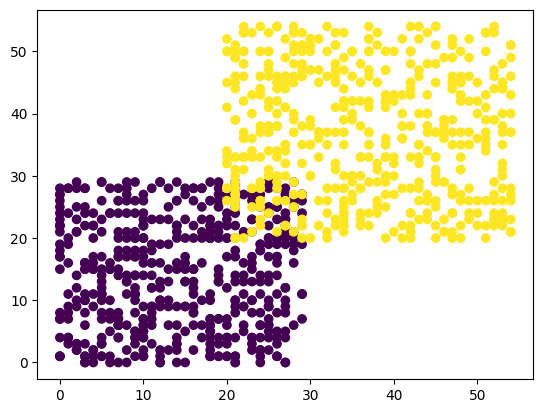

In [50]:
plt.scatter(X_data[:, 0], X_data[:, 1], c = Y_data)

In [51]:
from sklearn.utils import shuffle
X_data, Y_data = shuffle(X_data, Y_data, random_state = 42)

In [52]:
split = 0.8
X_train = X_data[: int(X_data.shape[0] * split), :]
X_test = X_data[int(X_data.shape[0] * split):, :]

Y_train = Y_data[: int(Y_data.shape[0] * split)]
Y_test = Y_data[int(Y_data.shape[0] * split):]

In [53]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(800, 2) (200, 2) (800, 1) (200, 1)


In [54]:
def distance_formula(p1, p2):
    return ((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)**0.5

In [55]:
distance_formula([1, 1], [1, 2])

1.0

In [56]:
class KNN_classifier:
    def __init__(self, X, Y, k):
        self.k = k
        self.X = X
        self.Y = Y
    
    def distance_formula(self, p1, p2):
        return ((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)**0.5
    
    def predict(self, test_point):
        distance = []
        
        for i in range(self.X.shape[0]):
            distance.append((self.distance_formula(test_point, self.X[i]), i))
        
        distance = sorted(distance)
        distance = distance[:self.k]
        
        classes = []
        
        for dist, i in distance:
            classes.append(self.Y[i])
        
        total, count = np.unique(classes, return_counts = True)
        
        index = np.argmax(count)
        
        print(f'Class: {total[index]}, with a prob: {count[index]/np.sum(count)}')
        
        return {'Class': total[index], 'Prob': count[index]/np.sum(count)}

In [64]:
li = [1,0,1,0,1,1,1,1,1,1,0,0,0,1,1,0,0,1,0]
print(np.unique(li, return_counts = True))

(array([0, 1]), array([ 8, 11], dtype=int64))


In [65]:
li = [3,12,5,4,1,2,22,5,142,3,5,0]
print(np.argmax(li))

8


In [59]:
knn_model = KNN_classifier(X_train, Y_train, 7)

In [60]:
print(X_test[0])
knn_model.predict(X_test[5])
knn_model.predict([22, 23])

[21 27]
Class: 0.0, with a prob: 0.8571428571428571
Class: 0.0, with a prob: 0.7142857142857143


{'Class': 0.0, 'Prob': 0.7142857142857143}

In [61]:
corr = 0

for i in range(X_test.shape[0]):
    pred = knn_model.predict(X_test[i])
    if pred['Class'] == Y_test[i]:
        corr += 1
print(corr/X_test.shape[0])

Class: 0.0, with a prob: 0.7142857142857143
Class: 1.0, with a prob: 1.0
Class: 1.0, with a prob: 1.0
Class: 1.0, with a prob: 1.0
Class: 0.0, with a prob: 1.0
Class: 0.0, with a prob: 0.8571428571428571
Class: 1.0, with a prob: 1.0
Class: 0.0, with a prob: 1.0
Class: 1.0, with a prob: 1.0
Class: 0.0, with a prob: 1.0
Class: 1.0, with a prob: 1.0
Class: 0.0, with a prob: 1.0
Class: 1.0, with a prob: 1.0
Class: 1.0, with a prob: 1.0
Class: 1.0, with a prob: 1.0
Class: 0.0, with a prob: 0.8571428571428571
Class: 1.0, with a prob: 0.8571428571428571
Class: 1.0, with a prob: 1.0
Class: 0.0, with a prob: 0.7142857142857143
Class: 1.0, with a prob: 1.0
Class: 0.0, with a prob: 1.0
Class: 1.0, with a prob: 1.0
Class: 1.0, with a prob: 1.0
Class: 1.0, with a prob: 1.0
Class: 0.0, with a prob: 1.0
Class: 1.0, with a prob: 1.0
Class: 0.0, with a prob: 0.7142857142857143
Class: 0.0, with a prob: 1.0
Class: 0.0, with a prob: 1.0
Class: 1.0, with a prob: 1.0
Class: 1.0, with a prob: 0.5714285714285

In [63]:
knn_model.predict([27, 27])

Class: 0.0, with a prob: 0.5714285714285714


{'Class': 0.0, 'Prob': 0.5714285714285714}